# Project 1

The Yemisi Shyllon Museum of Art is a university museum with the purpose of serving and engaging diverse audiences by advancing knowledge about Nigerian art and by offering exhibitions and educational programs that enable them to learn about art and through art. The museum has 3 main art collection categories: traditional art, modern art, and contemporary art. Dr Jess Castellote, the Director has recently contacted you as a computer vision developer to build an application that would enable the visitors to access images from each category, using the image transformation methods studied on the collection, following the criteria:
The visitor must have a valid email, must be above 18 years and the choice of collection category of interest must be specified.


In [1]:
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def translate_image(image_path, dx, dy):
    img = cv2.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    translated_img = cv2.warpAffine(img, M, (cols, rows))
    
    return img, translated_img
    
def reflect_image(image_path):
    img = cv2.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, 0, 0], [0, -1, rows]])
    reflected_img = cv2.warpAffine(img, M, (cols, rows))

    return img, reflected_img

def rotate_image(image_path, angle, scale):
    img = cv2.imread(image_path, 0)
    rows, cols = img.shape
    
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale)
    rotated_img = cv2.warpAffine(img, M, (cols, rows))

    return img, rotated_img

def crop_image(image_path, x1, y1, x2, y2):
    img = cv2.imread(image_path, 0)
    cropped_img = img[y1:y2, x1:x2]
    
    return img, cropped_img

def shear_image_x(image_path, shear_factor):
    img = cv2.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, shear_factor, 0], [0, 1, 0], [0, 0, 1]])
    sheared_img = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
    
    return img, sheared_img

def shear_image_y(image_path, shear_factor):
    img = cv2.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0], [0, 0, 1]])
    sheared_img = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
    
    return img, sheared_img

def apply_blur(image_path, blur_type):
    img = cv2.imread(image_path)
    
    if blur_type == 'Gaussian':
        blurred_img = cv2.GaussianBlur(img, (7, 7), 0)
    elif blur_type == 'Median':
        blurred_img = cv2.medianBlur(img, 5)
    elif blur_type == 'Bilateral':
        blurred_img = cv2.bilateralFilter(img, 9, 75, 75)
    else:
        print("Invalid blur type.")
        return
    return img, blurred_img



In [3]:
# Function to validate email
def validate_email(email):
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(email_pattern, email) is not None

# Function to validate age
def validate_age(age):
    return age >= 18

def format_title(title):
    title_without_format = title.split('.')[0]
    return ' '.join(word.capitalize() for word in title_without_format.split('-'))

def unformat_title(formatted_title):
    return '-'.join(word.lower() for word in formatted_title.split())

def get_numeric_input(prompt, error_message=None):
    while True:
        try:
            value = int(input(prompt))
            return value
        except ValueError:
            if error_message:
                print(error_message)
            else:
                print("Invalid input. Please enter a number.")


# Function to display categories
def display_categories():
    categories = ['Traditional Art', 'Modern Art', 'Contemporary Art']
    for i, category in enumerate(categories, 1):
        print(f"{i}. {category}")

def display_images(category):
    category = category.lower().replace(" ", "-")
    category_folder = f"../images/project-images/{category}/"
    images = sorted(os.listdir(category_folder))
    num_images = len(images)

    # Calculate the number of rows and columns for the grid
    num_cols = 4  # Adjust as needed
    num_rows = (num_images - 1) // num_cols + 1

    # Display images in a grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img = cv2.imread(category_folder + images[i])
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.set_title(f"{i + 1}. {format_title(images[i])}")
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()
    return category_folder, images


def select_image(category_folder, images):
    while True:
        choice = input("Enter the number of the image you want to transform (or 'exit' to quit): ")
        if choice.lower() == 'exit':
            return None
        if choice.isdigit():
            index = int(choice) - 1
            if 0 <= index < len(images):
                print(f"\nYou have selected image {index + 1}: {format_title(images[index])}")
                img = cv2.imread(category_folder + images[index])
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title(f"{format_title(images[index])}")
                
                plt.show()
                return images[index]
        print("Invalid input. Please enter a valid image number.")

In [4]:
# Function to perform image transformation
def perform_transformation(image_path, transformation):
    transformed_img = None
    img = None
    
    transformations = {
        1: 'Translate',
        2: 'Reflect',
        3: 'Rotate',
        4: 'Crop',
        5: 'Shear X',
        6: 'Shear Y',
        7: 'Gaussian Blur',
        8: 'Median Blur',
        9: 'Bilateral Blur'
    }

    # Check if the transformation option exists
    if transformation not in transformations:
        print("Invalid transformation option.")
        return
    
    # Execute the selected transformation
    if transformation == 1:
        dx = int(input("Enter translation along x-axis (pixels): "))
        dy = int(input("Enter translation along y-axis (pixels): "))
        img, transformed_img = translate_image(image_path, dx, dy)
        
    elif transformation == 2:
        img, transformed_img = reflect_image(image_path)
        
    elif transformation == 3:
        angle = float(input("Enter rotation angle (degrees): "))
        scale = float(input("Enter scale factor: "))
        img, transformed_img = rotate_image(image_path, angle, scale)
        
    elif transformation == 4:
        x1 = int(input("Enter starting x-coordinate for cropping: "))
        y1 = int(input("Enter starting y-coordinate for cropping: "))
        x2 = int(input("Enter ending x-coordinate for cropping: "))
        y2 = int(input("Enter ending y-coordinate for cropping: "))
        img, transformed_img = crop_image(image_path, x1, y1, x2, y2)
        
    elif transformation == 5:
        shear_factor = float(input("Enter shear factor along x-axis:: "))
        img, transformed_img = shear_image_x(image_path, shear_factor)
        
    elif transformation == 6:
        shear_factor = float(input("Enter shear factor along y-axis: "))
        img, transformed_img = shear_image_y(image_path, shear_factor)
        
    elif transformation == 7:
        img, transformed_img = apply_blur(image_path, 'Gaussian')
        
    elif transformation == 8:
        img, transformed_img = apply_blur(image_path, 'Median')
        
    elif transformation == 9:
        img, transformed_img = apply_blur(image_path, 'Bilateral')
    
    # Display the original and transformed images side by side
    if transformed_img is not None:
        
        if transformation in [7, 8, 9]:
            
            # Plot the original image
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

            # Plot the transformed image
            plt.subplot(1, 2, 2)
            plt.title(f"{transformations[transformation]} Image")
            plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
        
        
        else:
            
            # Plot the original image
            plt.subplot(1, 2, 1)
            plt.title("Original")
            plt.imshow(img)

            # Plot the transformed image
            plt.subplot(1, 2, 2)
            plt.title(f"{transformations[transformation]} Image")
            plt.imshow(transformed_img)
            
        plt.show()

Enter your email: ojeahfrancis@gmail.com
Enter your age: 19
Welcome to the Yemisi Shyllon Museum of Art!

Please select a category:
1. Traditional Art
2. Modern Art
3. Contemporary Art

Enter the number of the category you're interested in: 3

Displaying images from Contemporary Art category:


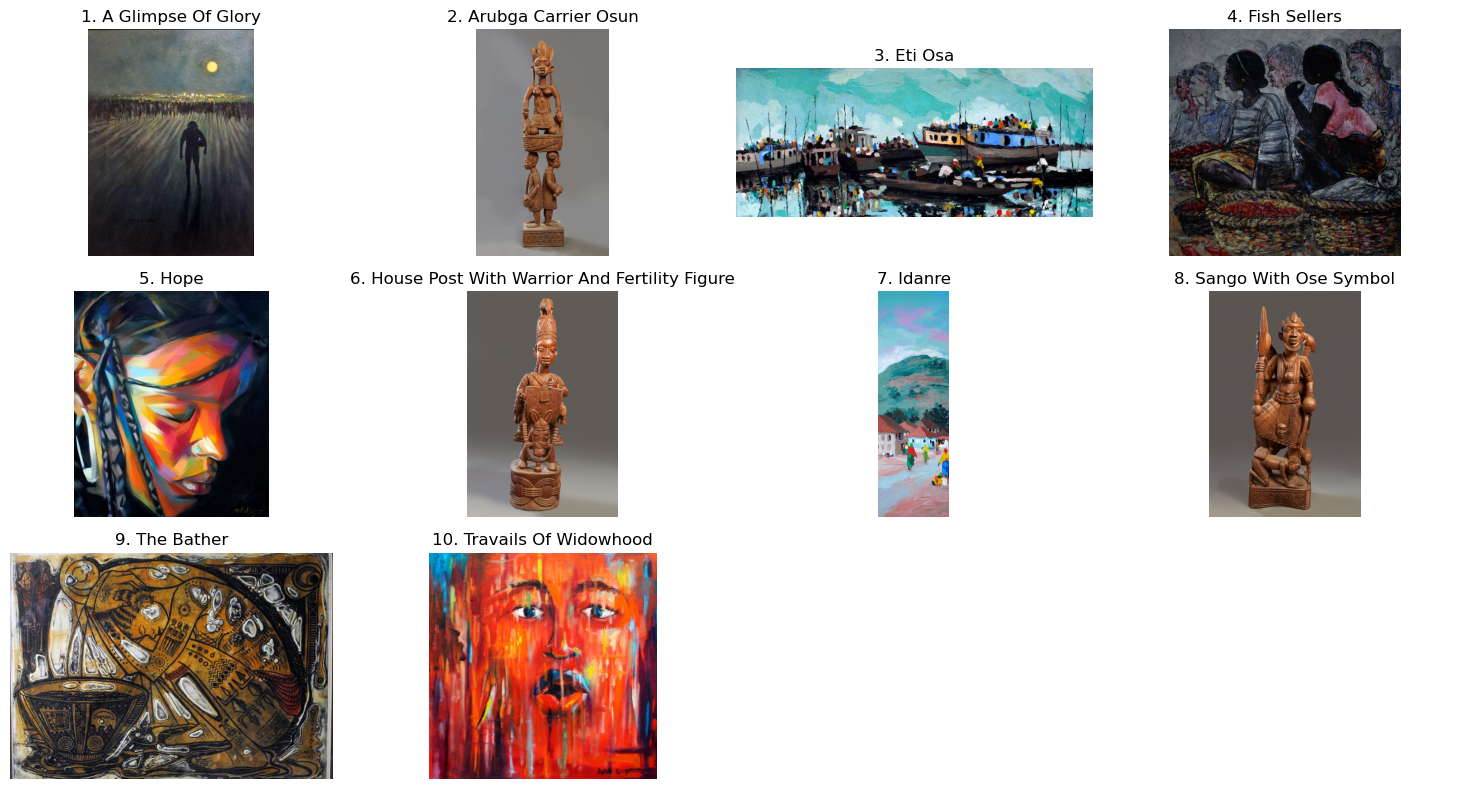

Enter the number of the image you want to transform (or 'exit' to quit): 1

You have selected image 1: A Glimpse Of Glory


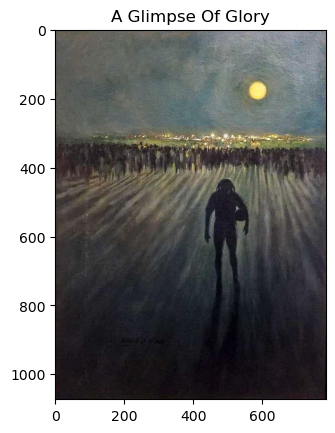


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 1

Applying Translate transformation to A Glimpse Of Glory:
Enter translation along x-axis (pixels): 100
Enter translation along y-axis (pixels): 50


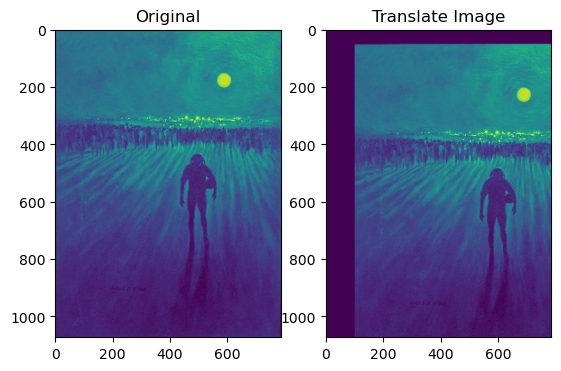

Enter the number of the image you want to transform (or 'exit' to quit): 2

You have selected image 2: Arubga Carrier Osun


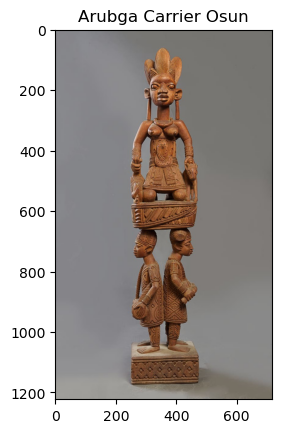


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 2

Applying Reflect transformation to Arubga Carrier Osun:


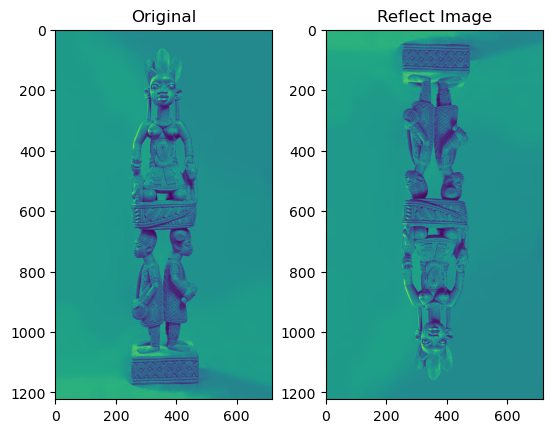

Enter the number of the image you want to transform (or 'exit' to quit): 3

You have selected image 3: Eti Osa


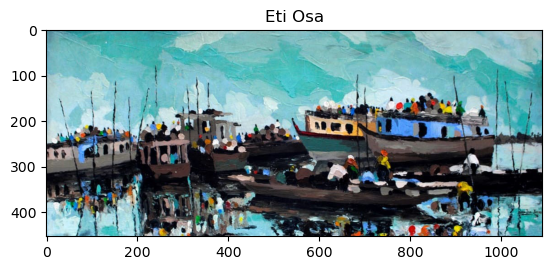


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 3

Applying Rotate transformation to Eti Osa:
Enter rotation angle (degrees): 50
Enter scale factor: 1


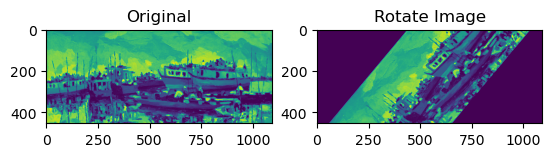

Enter the number of the image you want to transform (or 'exit' to quit): 4

You have selected image 4: Fish Sellers


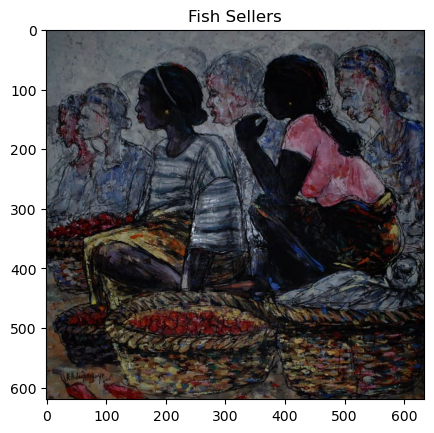


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 4

Applying Crop transformation to Fish Sellers:
Enter starting x-coordinate for cropping: 100
Enter starting y-coordinate for cropping: 420
Enter ending x-coordinate for cropping: 420
Enter ending y-coordinate for cropping: 605


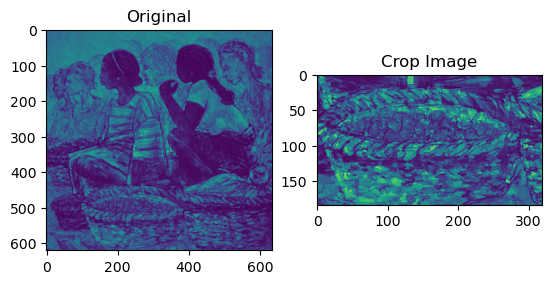

Enter the number of the image you want to transform (or 'exit' to quit): 5

You have selected image 5: Hope


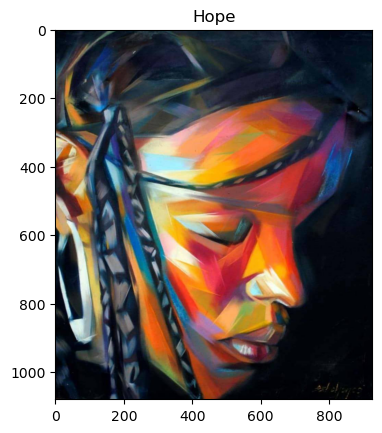


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 5

Applying Shear X transformation to Hope:
Enter shear factor along x-axis:: 0.5


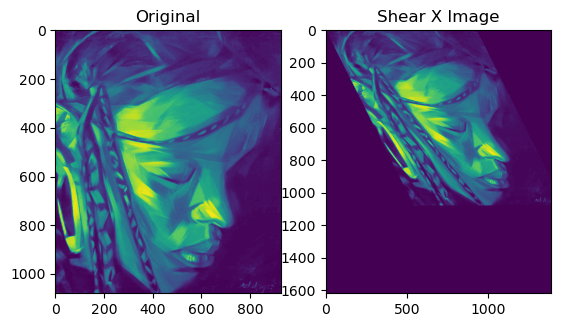

Enter the number of the image you want to transform (or 'exit' to quit): 6

You have selected image 6: House Post With Warrior And Fertility Figure


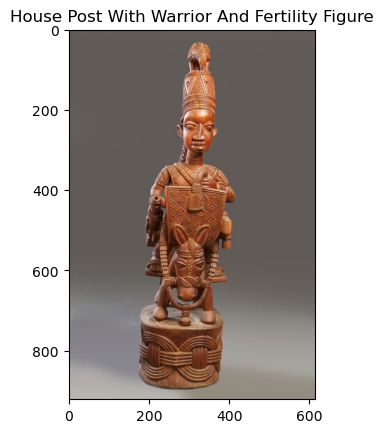


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 6

Applying Shear Y transformation to House Post With Warrior And Fertility Figure:
Enter shear factor along y-axis: 0.5


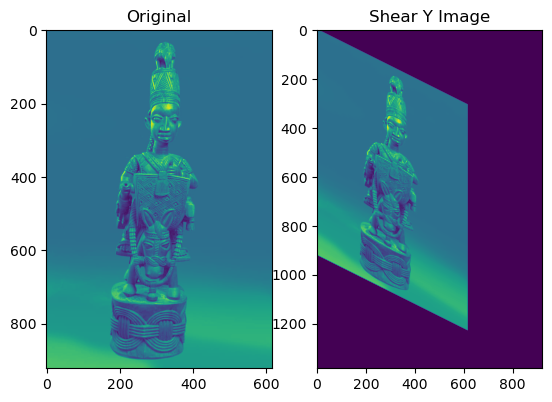

Enter the number of the image you want to transform (or 'exit' to quit): 7

You have selected image 7: Idanre


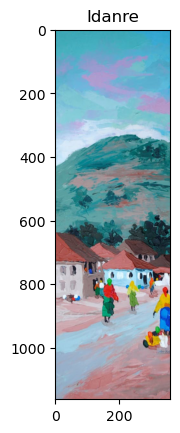


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 7

Applying Gaussian Blur transformation to Idanre:


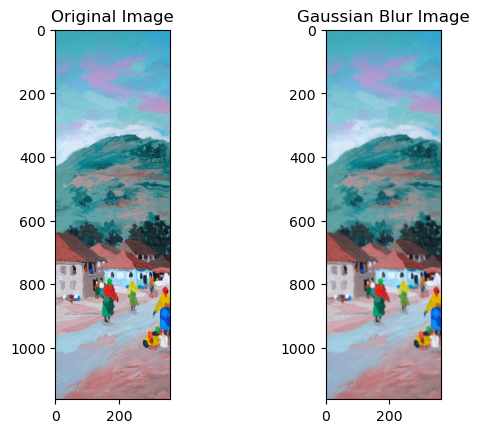

Enter the number of the image you want to transform (or 'exit' to quit): 8

You have selected image 8: Sango With Ose Symbol


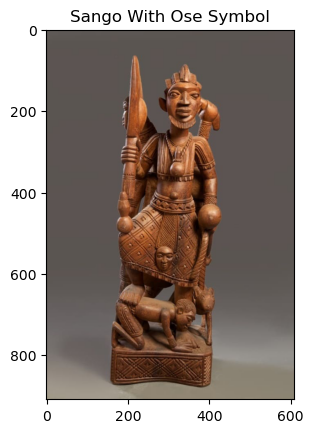


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 8

Applying Median Blur transformation to Sango With Ose Symbol:


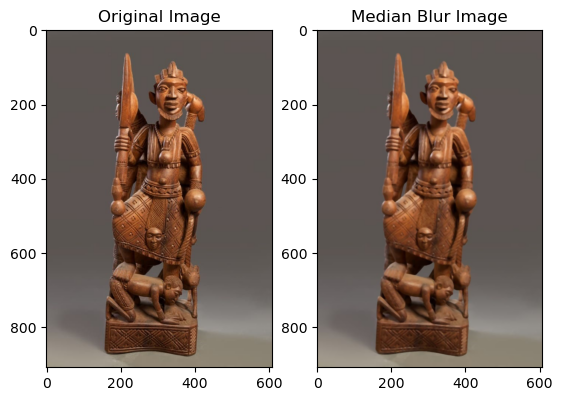

Enter the number of the image you want to transform (or 'exit' to quit): 9

You have selected image 9: The Bather


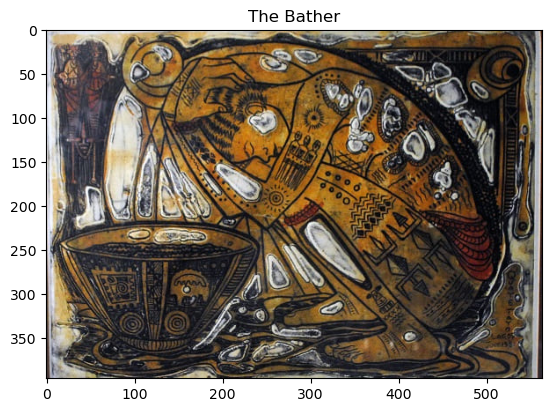


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 9

Applying Bilateral Blur transformation to The Bather:


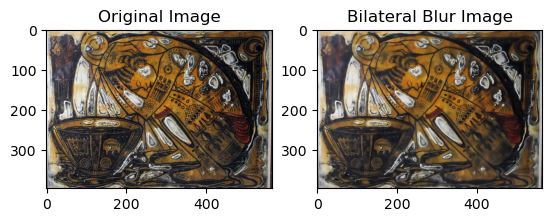

Enter the number of the image you want to transform (or 'exit' to quit): 10

You have selected image 10: Travails Of Widowhood


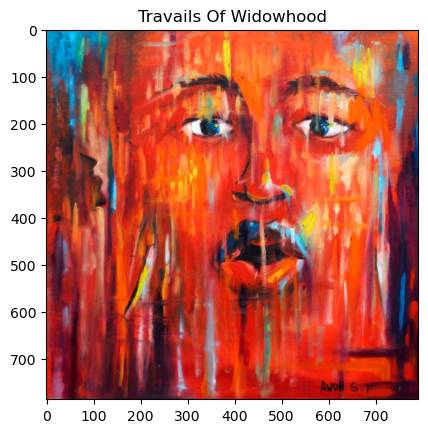


Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear X
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 2

Applying Reflect transformation to Travails Of Widowhood:


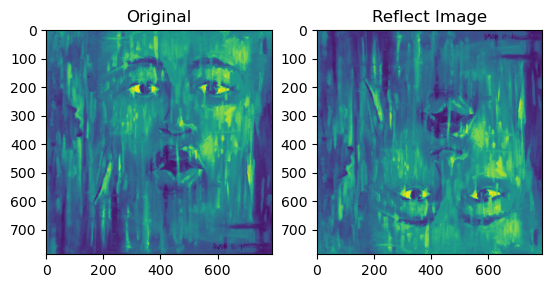

Enter the number of the image you want to transform (or 'exit' to quit): exit


In [5]:
valid_email = False
while not valid_email:
    email = input("Enter your email: ")
    valid_email = validate_email(email)
    
    if not valid_email:
        print("Invalid email. Please try again.")

age = get_numeric_input("Enter your age: ", "Age must be a valid number.")

if age < 18:
    print("You must be 18 or older to access the application.")
else:
    print("Welcome to the Yemisi Shyllon Museum of Art!")
    print("\nPlease select a category:")
    
    display_categories()
    category_choice = get_numeric_input("\nEnter the number of the category you're interested in: ")

    category_map = {1: 'Traditional Art', 2: 'Modern Art', 3: 'Contemporary Art'}
    selected_category = unformat_title(category_map.get(category_choice))

    if selected_category:
        print(f"\nDisplaying images from {format_title(selected_category)} category:")
        category_folder, images = display_images(selected_category)

        while True:
            selected_image = select_image(category_folder, images)
            if not selected_image:
                break

            print("\nAvailable transformations:")
            transformations = [
                'Translate', 'Reflect', 'Rotate', 'Crop', 
                'Shear X', 'Shear Y', 'Gaussian Blur', 
                'Median Blur', 'Bilateral Blur'
            ]
            
            for i, transformation in enumerate(transformations, 1):
                print(f"{i}. {transformation}")
                
            transformation_choice = get_numeric_input("\nEnter the number of the transformation you want to apply: ")
            
            if 1 <= transformation_choice <= len(transformations):
                
                print(f"\nApplying {transformations[transformation_choice - 1]} transformation to {format_title(selected_image)}:")
                perform_transformation(f"../images/project-images/{selected_category}/{selected_image}", transformation_choice)
                
            else:
                print("\nInvalid transformation choice. Please try again.")

    else:
        print("Invalid category choice. Please try again.")